In [21]:
import numpy as np
import numpy.linalg as la
import scipy.linalg as sla
import matplotlib.pyplot as plt

In [22]:
pts = np.array([[2, 4], [3, 2], [5, 1], [6, 0]])
# Reformat looks like:
# [[2, 4], 
#  [3, 2], 
#  [5, 1], 
#  [6, 0]]

t_vector = pts[:,0]
y_vector = pts[:,1]
# y being value.
# Note that we are solving for:
# y = A x
# 
# So given M is max, A is constant, k is constant:
# y = M / (1 + A e^(-k t))
# OR
# y = M / (1 + e^(-k(x - x0)))
# Where t0 is infliction point (time where halfway point is at.) (Is there an A?)
# OR
# y'(t) = k y (M - y)
# (This is a dynamical system)

# Ended up having 1s second
A_line_transpose = np.array([t_vector , np.ones(len(t_vector))])
A_line = A_line_transpose.T

# A.T y = A.T A x
# for best solution of x
# x = (A.T A)^-1 @ (A.T y)

### Using scipy to solve this:


Use this website for help:

- https://stackoverflow.com/questions/60160803/scipy-optimize-curve-fit-for-logistic-function


In [23]:
from scipy.optimize import curve_fit
import pandas as pd

# Define the Logistic function
def func(t, M, x0, k, offset):
    return M / (1 + np.e**(-k * (t - x0))) + offset

# Check this to read comma separated values
M3_data = pd.read_csv("M3 Seattle Data.csv", dtype={'year': np.int64})
# print out first 5 rows of the data
print(M3_data.head())

# Get the data
t_data = M3_data['Year'].values
housing_data = M3_data['Total housing units'].values



   Year  Total housing units
0  2010               302465
1  2011               304164
2  2012               306694
3  2013               309205
4  2014               311286


In [24]:
# For inital guesses: p0=[MAX, INFLICTION TIME, k, OFFSET]
popt, pcov = curve_fit(func, t_data, housing_data, p0=[500000, 2030, .1, 100000])

print(popt)

[7.13972203e+04 2.01744800e+03 6.23555791e-01 3.03401444e+05]


In [25]:
# Creating list to extrapolate to further values:
t_futures = [2030,2100,10]
print(t_futures)

predicted_list = func(t_data, popt[0], popt[1], popt[2], popt[3])
print(predicted_list)


[2030, 2100, 10]
[304081.51755561 304659.78072727 305713.66136022 307597.38401495
 310850.27586002 316146.68569107 323996.21270151 334145.99498508
 345183.90966586 355141.06498392 362718.33487642 367771.5387804
 370851.63875163]


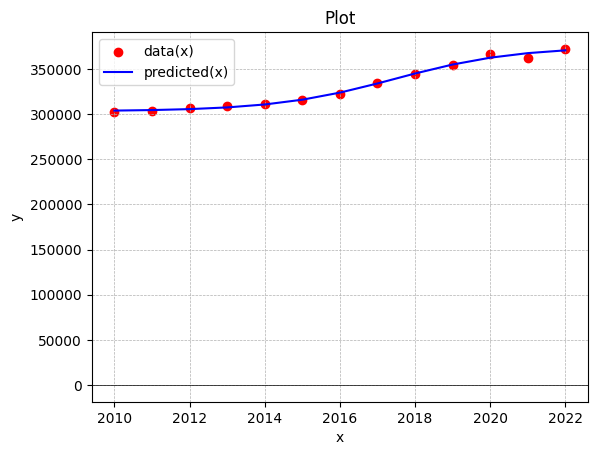

In [27]:
plt.scatter(t_data, housing_data, label='data(x)', color='red')
plt.plot(t_data, predicted_list, label='predicted(x)', color='blue')

plt.axhline(0, color='black', linewidth=0.5)

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

Note to self for future reference: Need to know stuff like max possible value to get a graph that fits better.